In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import scipy.io

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2]:
def CompressData(data, threshold):
    compdata = []
    compdata.append(data[0])
    compdata.append(data[1])
    for i in range(2, len(data)):
        if np.abs(data[i, 1] - data[i-1, 1]) > threshold:
            compdata.append(data[i])
    compdata = np.array(compdata).reshape(-1, 2)
    return compdata

In [3]:
def Bounds(datapoint, compdata):
    upper = data[-1]
    lower = data[0]
    for i in range(len(compdata)):
        if compdata[i, 0] > datapoint:
            upper = deepcopy(compdata[i])
            break
    for i in range(len(compdata)):
        if compdata[len(compdata) - i - 1, 0] < datapoint:
            lower = deepcopy(compdata[len(compdata) - i - 1])
            break
    return upper, lower

In [4]:
def EstimateY(x, compdata):
    upper, lower = Bounds(x, compdata)
    slope = (upper[1] - lower[1])/(upper[0] - lower[0])
    datapointY = slope * (x - lower[0]) + lower[1]
    return datapointY


In [5]:
def Reconstruct(compdata, data):
    noncomp = [element for element in data[:, 0] if element not in compdata[:, 0]]
    interpolate = []
    for x in noncomp:
        y = EstimateY(x, compdata)
        interpolate.append([x, y])

    interpolate = np.array(interpolate).reshape(-1, 2)
    Reconstructed = np.append(interpolate, compdata, axis = 0)
    Reconstructed = Reconstructed[Reconstructed[:, 0].argsort()]
    return Reconstructed

In [6]:
def Accuracy(compdata, data, Reconstructed):
    CR = len(compdata) / len(data)
    error = deepcopy(np.sqrt(np.sum((Reconstructed[:, 1] - data[:, 1]) ** 2)))
    energy = deepcopy(np.sqrt(np.sum((data[:, 1]) ** 2)))
    prd = error / energy
    print(f"CR: {1 / CR}")
    print(f"PRD: {prd * 100} %")

In [7]:
def ECG():
    data = scipy.io.loadmat('/content/drive/MyDrive/Depo/PhysioNet/223m (6).mat')['val'][0][0:500]
    data = data.reshape(-1, 1)
    x = np.arange(0, len(data), 1).reshape(-1, 1)
    data = np.append(x, data, axis= 1)
    return data

In [8]:
def EEG():
    data = np.array(pd.read_csv('/content/drive/MyDrive/Depo/PhysioNet/Auditory evoked potential EEG-Biometric dataset2.csv', header=None))
    scaler.fit(data)
    data = scaler.transform(data)
    x = np.arange(0, len(data), 1).reshape(-1, 1).astype(int)
    data = np.append(x, data, axis= 1)
    return data

In [9]:
data = ECG()

Text(0.5, 1.0, 'Original Signal')

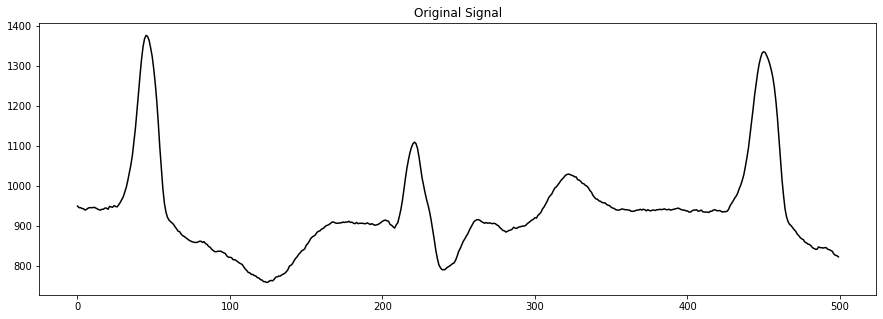

In [10]:
plt.figure(figsize= (15, 5))
plt.plot(data[:, 0], data[:, 1], c= 'black')
plt.title('Original Signal')

In [11]:
compdata = CompressData(data, 5)

Text(0.5, 1.0, 'compressed data')

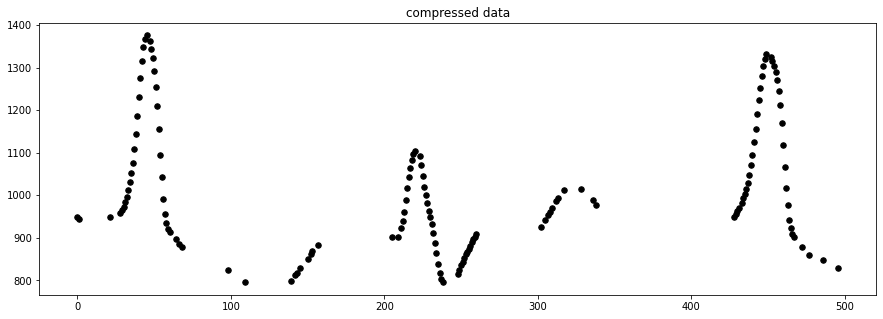

In [12]:
plt.figure(figsize= (15, 5))
plt.scatter(compdata[:, 0], compdata[:, 1], s= 30, c= 'black')
plt.title('compressed data')

In [13]:
Reconstructed = Reconstruct(compdata, data)

Text(0.5, 1.0, 'reconstructed data')

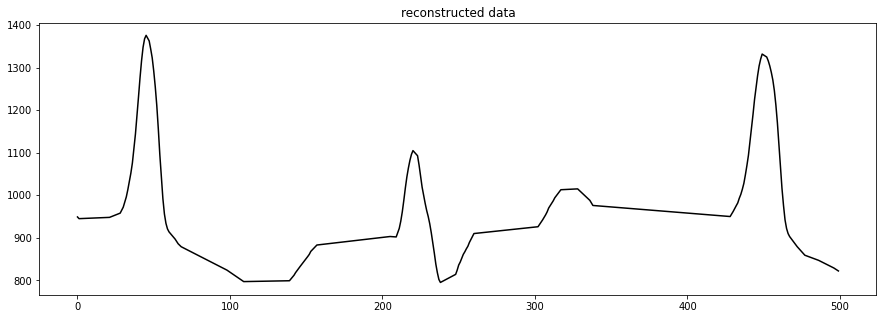

In [14]:
plt.figure(figsize= (15, 5))
plt.plot(Reconstructed[:, 0], Reconstructed[:, 1], c = 'black')
plt.title('reconstructed data')

In [15]:
Accuracy(compdata, data, Reconstructed)

CR: 3.546099290780142
PRD: 1.4533810614248788 %


In [16]:
data = EEG()
compdata = CompressData(data, 0.025)
Reconstructed = Reconstruct(compdata, data)

Text(0.5, 1.0, 'Original Signal')

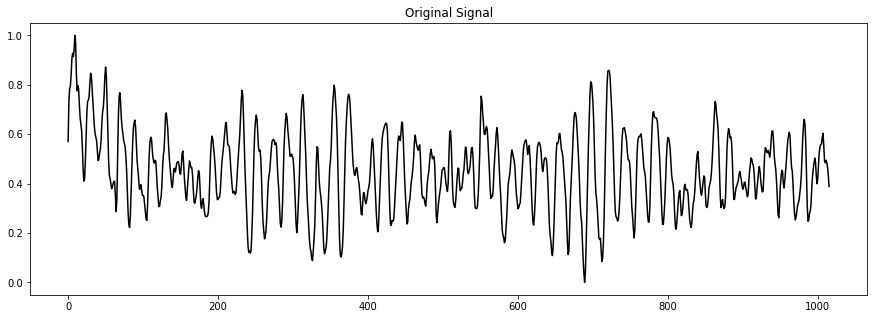

In [17]:
plt.figure(figsize= (15, 5))
plt.plot(data[:, 0], data[:, 1], c= 'black')
plt.title('Original Signal')

Text(0.5, 1.0, 'compressed data')

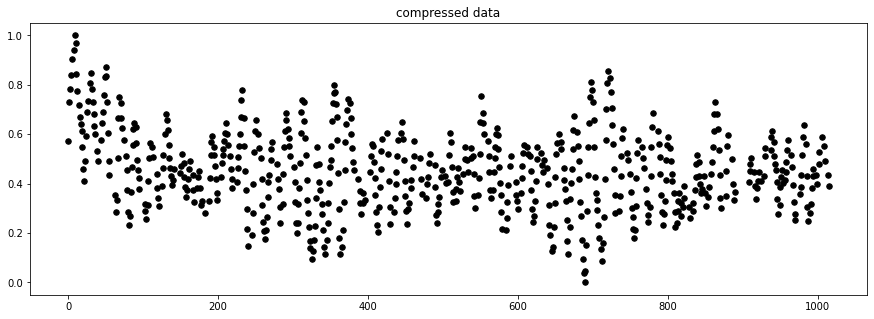

In [18]:
plt.figure(figsize= (15, 5))
plt.scatter(compdata[:, 0], compdata[:, 1], s= 30, c= 'black')
plt.title('compressed data')

Text(0.5, 1.0, 'reconstructed data')

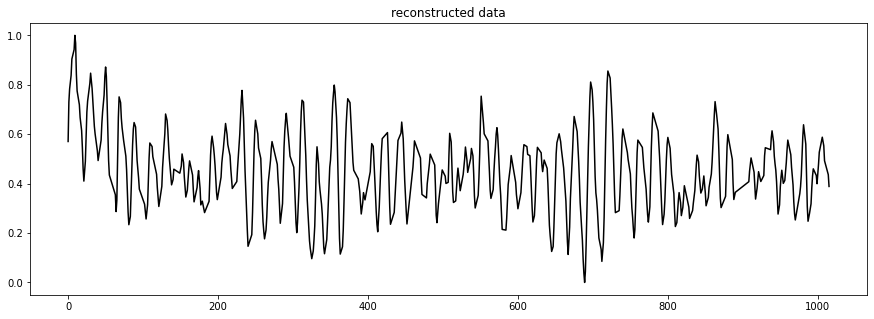

In [19]:
plt.figure(figsize= (15, 5))
plt.plot(Reconstructed[:, 0], Reconstructed[:, 1], c = 'black')
plt.title('reconstructed data')

In [20]:
Accuracy(compdata, data, Reconstructed)

CR: 1.5727554179566563
PRD: 3.493993317792246 %
